## M08 Machine Learning: Classification Demo

#### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load the datset

In [2]:
from google.colab import drive     # Mount google drive so that Google Colab can see the data files.
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
column_names = ['sequence_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'site']

df = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Live Session Notebooks/yeast/yeast.csv',header=0,names=column_names)
df.head()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,site
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sequence_name  1483 non-null   object 
 1   mcg            1483 non-null   float64
 2   gvh            1483 non-null   float64
 3   alm            1483 non-null   float64
 4   mit            1483 non-null   float64
 5   erl            1483 non-null   float64
 6   pox            1483 non-null   float64
 7   vac            1483 non-null   float64
 8   nuc            1483 non-null   float64
 9   site           1483 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [5]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (1483, 10)

Feature Names:
['sequence_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'site']

First few rows:
  sequence_name   mcg   gvh   alm   mit  erl  pox   vac   nuc site
0    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
1    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
2    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
3    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
4    AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22  CYT


In [6]:
# Check class distribution
print("\nProtein Localization Sites Distribution:")
print(df['site'].value_counts())


Protein Localization Sites Distribution:
site
CYT    463
NUC    429
MIT    243
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64


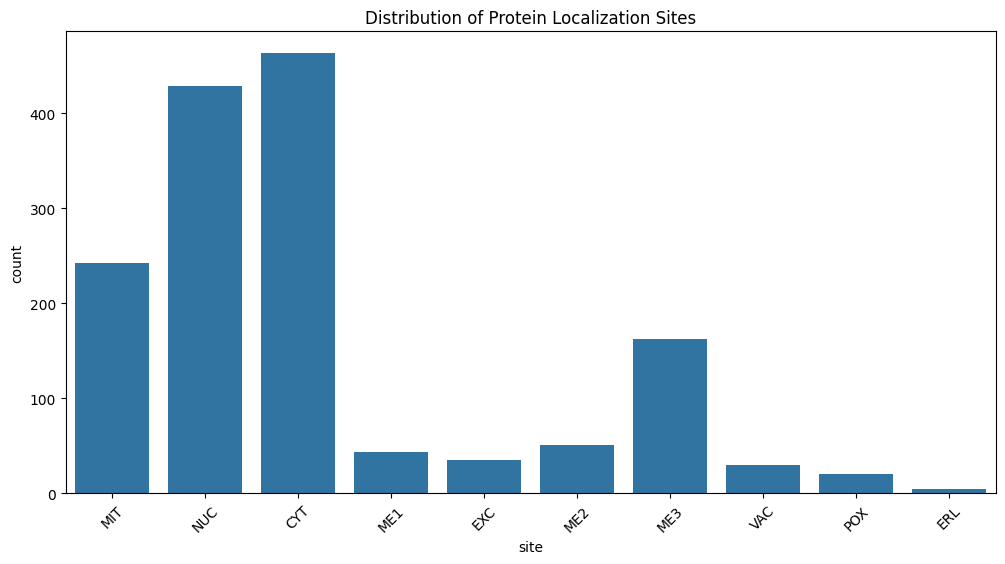

In [7]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='site')
plt.title('Distribution of Protein Localization Sites')
plt.xticks(rotation=45)
plt.show()

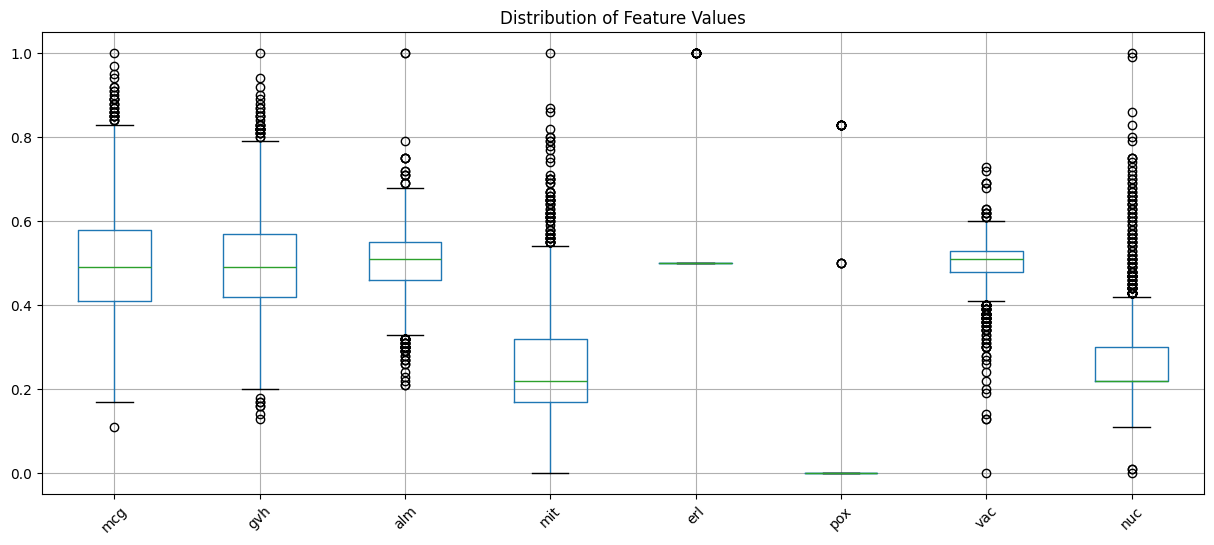

In [8]:
# Feature distributions
feature_cols = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
plt.figure(figsize=(15, 6))
df[feature_cols].boxplot()
plt.title('Distribution of Feature Values')
plt.xticks(rotation=45)
plt.show()

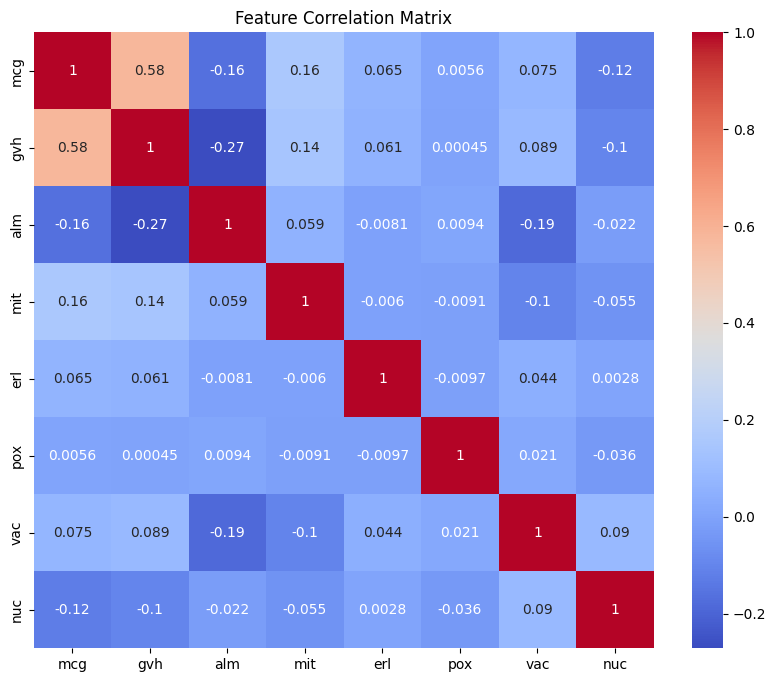

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

#### 3. Data Pre-processing

In [10]:
# Prepare features and target
X = df[feature_cols]
y = df['site']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_encoded)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1186, 8)
Testing set shape: (297, 8)


In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

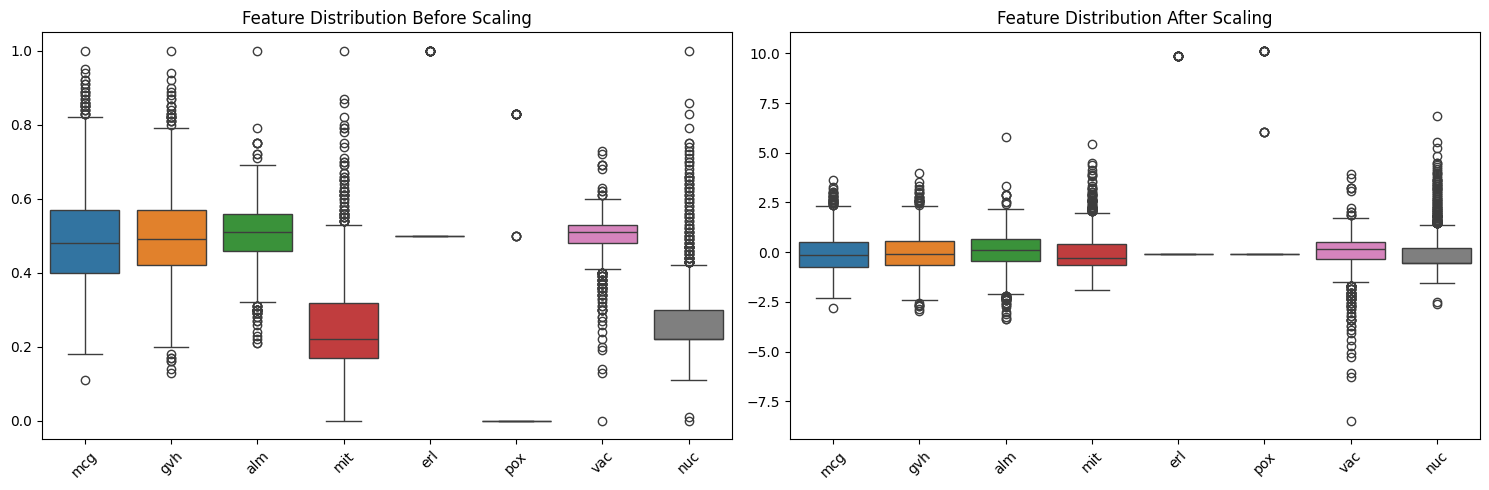

In [13]:
# Visualize scaled vs unscaled data
def plot_scaling_effect():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Before scaling
    sns.boxplot(data=X_train, ax=ax1)
    ax1.set_title('Feature Distribution Before Scaling')
    ax1.tick_params(axis='x', rotation=45)

    # After scaling
    sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=feature_cols), ax=ax2)
    ax2.set_title('Feature Distribution After Scaling')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_scaling_effect()

#### 3. KNN Model and Evaluation

In [14]:
# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [15]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [16]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")



Model Accuracy: 0.56


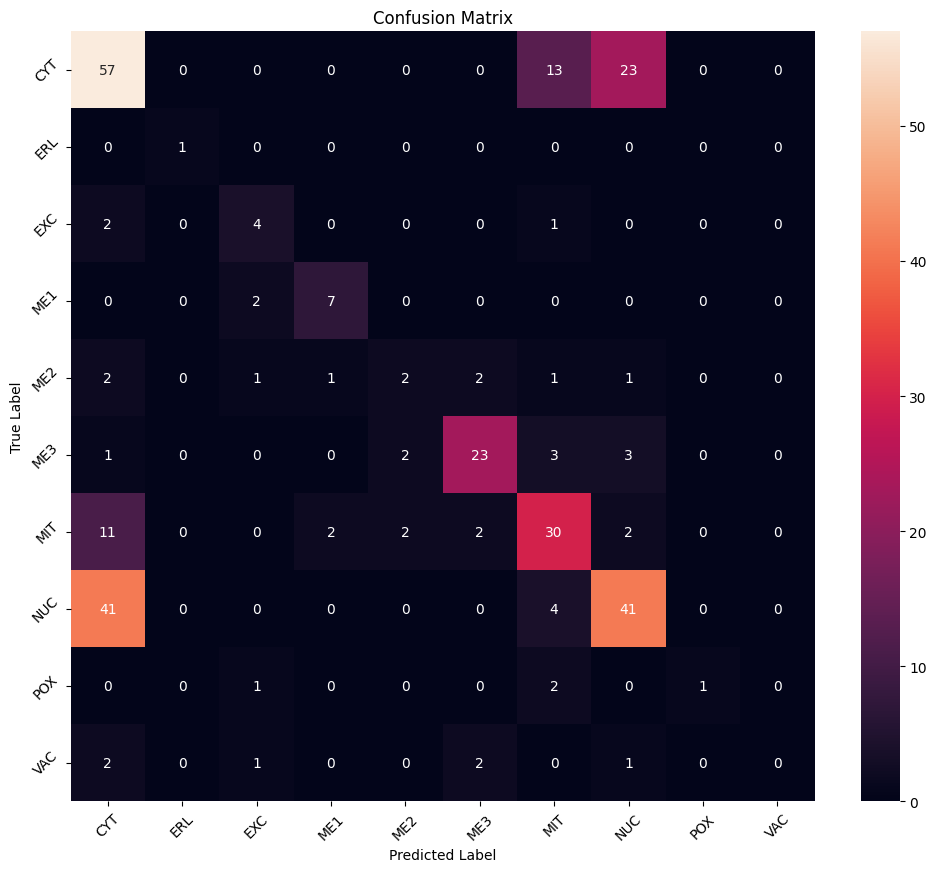

In [17]:

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [18]:

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

         CYT       0.49      0.61      0.55        93
         ERL       1.00      1.00      1.00         1
         EXC       0.44      0.57      0.50         7
         ME1       0.70      0.78      0.74         9
         ME2       0.33      0.20      0.25        10
         ME3       0.79      0.72      0.75        32
         MIT       0.56      0.61      0.58        49
         NUC       0.58      0.48      0.52        86
         POX       1.00      0.25      0.40         4
         VAC       0.00      0.00      0.00         6

    accuracy                           0.56       297
   macro avg       0.59      0.52      0.53       297
weighted avg       0.56      0.56      0.55       297



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


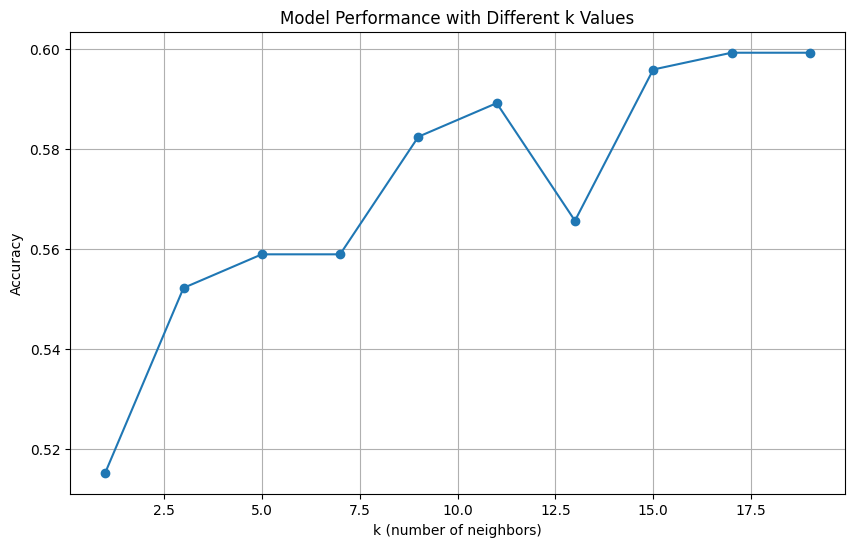

In [19]:
# Analyze model performance for different k values
k_range = range(1, 20, 2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('Model Performance with Different k Values')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [20]:
# Example prediction
def predict_protein_location(model, scaler, features):
    features_scaled = scaler.transform([features])
    prediction = model.predict(features_scaled)
    return le.inverse_transform(prediction)[0]

# Example usage
sample_protein = [0.58, 0.61, 0.47, 0.13, 0.50, 0.00, 0.48, 0.22]
predicted_location = predict_protein_location(knn, scaler, sample_protein)
print("\nSample Prediction:")
print(f"Predicted Protein Location: {predicted_location}")
print("Input features:", dict(zip(feature_cols, sample_protein)))


Sample Prediction:
Predicted Protein Location: CYT
Input features: {'mcg': 0.58, 'gvh': 0.61, 'alm': 0.47, 'mit': 0.13, 'erl': 0.5, 'pox': 0.0, 'vac': 0.48, 'nuc': 0.22}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
